In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
from sklearn.datasets import load_boston
boston_dataset=load_boston()
boston=pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['medv']=boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
medv       0
dtype: int64

In [7]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
boston.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
boston.shape

(506, 14)

<AxesSubplot:xlabel='RM', ylabel='medv'>

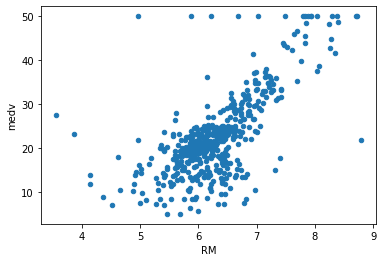

In [10]:
boston.plot.scatter('RM','medv')

In [11]:
X=boston[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
Y=boston['medv']

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [13]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [14]:
pred=model.predict(X_test)

Text(0, 0.5, 'Y_predicted')

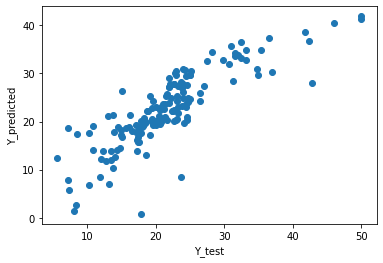

In [15]:
plt.scatter(Y_test,pred)
plt.xlabel('Y_test')
plt.ylabel('Y_predicted')

In [16]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(Y_test,pred))
print("MSE:",metrics.mean_squared_error(Y_test,pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test,pred)))

MAE: 3.2984676785177616
MSE: 19.966503135587583
RMSE: 4.468389322293614


(array([ 2.,  0.,  1.,  3.,  7.,  3.,  9., 11., 12., 13., 16., 14., 22.,
        12.,  5.,  7.,  2.,  5.,  1.,  2.,  1.,  1.,  0.,  0.,  0.,  0.,
         0.,  2.,  0.,  1.]),
 array([-1.14162603e+01, -1.04653114e+01, -9.51436252e+00, -8.56341361e+00,
        -7.61246471e+00, -6.66151580e+00, -5.71056690e+00, -4.75961799e+00,
        -3.80866908e+00, -2.85772018e+00, -1.90677127e+00, -9.55822369e-01,
        -4.87346412e-03,  9.46075441e-01,  1.89702435e+00,  2.84797325e+00,
         3.79892216e+00,  4.74987106e+00,  5.70081997e+00,  6.65176887e+00,
         7.60271778e+00,  8.55366668e+00,  9.50461559e+00,  1.04555645e+01,
         1.14065134e+01,  1.23574623e+01,  1.33084112e+01,  1.42593601e+01,
         1.52103090e+01,  1.61612579e+01,  1.71122068e+01]),
 <BarContainer object of 30 artists>)

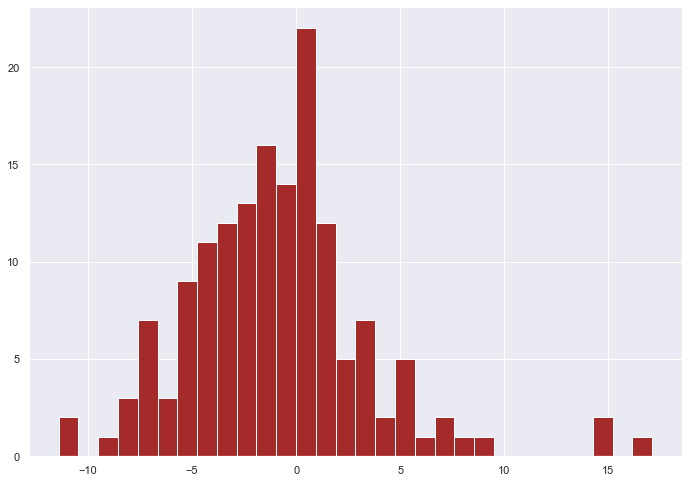

In [39]:
plt.hist(Y_test-pred, color="brown" ,bins=30)

<AxesSubplot:>

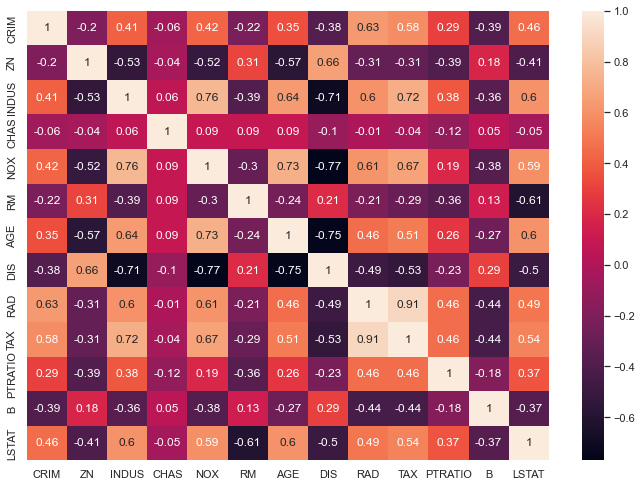

In [41]:
boston=pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True )